<a href="https://colab.research.google.com/github/RandiBro234/Neural-Network/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SINGLE PERCEPTRON**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fungsi Single Perceptron Manual

In [ ]:
class SinglePerceptron:
    def __init__(self, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.loss_history = []  # Initialize loss_history here

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.loss_history = [] # Reset loss_history for each fit call

        for _ in range(self.epochs):
            epoch_loss = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.lr * (target - y_pred)

                self.weights += update * xi
                self.bias += update
                epoch_loss += (target - y_pred)**2 # Calculate squared error
            self.loss_history.append(epoch_loss / len(X)) # Append average loss for the epoch

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

Fungsi Evaluasi Akurasi

In [ ]:
def evaluate(model, X, y):
    preds = model.predict(X)
    acc = (preds == y).mean()
    return acc

Dataset AND

In [ ]:
df_and = pd.read_csv("AND.csv")
X_and = df_and.iloc[:, :-1].values
y_and = df_and.iloc[:, -1].values

model_and = SinglePerceptron(lr=0.1, epochs=20)
model_and.fit(X_and, y_and)

acc_and = evaluate(model_and, X_and, y_and)
acc_and

np.float64(1.0)

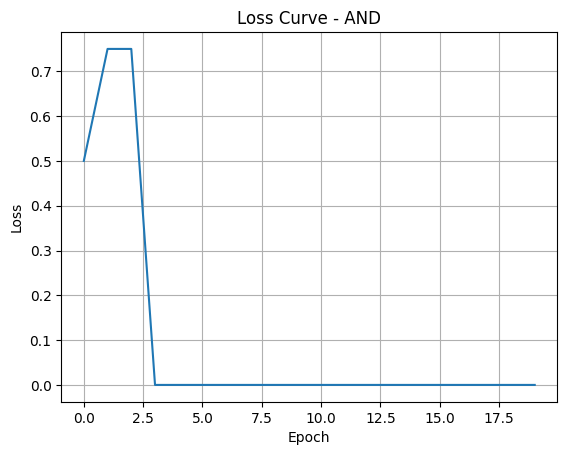

In [ ]:
plt.plot(model_and.loss_history)
plt.title("Loss Curve - AND")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Dataset OR

In [ ]:
df_or = pd.read_csv("OR.csv")
X_or = df_or.iloc[:, :-1].values
y_or = df_or.iloc[:, -1].values

model_or = SinglePerceptron(epochs=20)
model_or.fit(X_or, y_or)

acc_or = evaluate(model_or, X_or, y_or)
acc_or

np.float64(1.0)

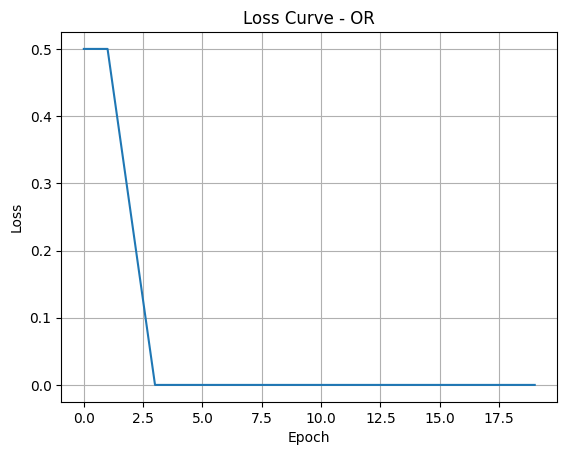

In [ ]:
plt.plot(model_or.loss_history)
plt.title("Loss Curve - OR")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Dataset AND-NOT

In [ ]:
df_and_not = pd.read_csv("AND_NOT.csv")
X_and_not = df_and_not.iloc[:, :-1].values
y_and_not = df_and_not.iloc[:, -1].values

model_and_not = SinglePerceptron(epochs=20)
model_and_not.fit(X_and_not, y_and_not)

acc_and_not = evaluate(model_and_not, X_and_not, y_and_not)
acc_and_not

np.float64(1.0)

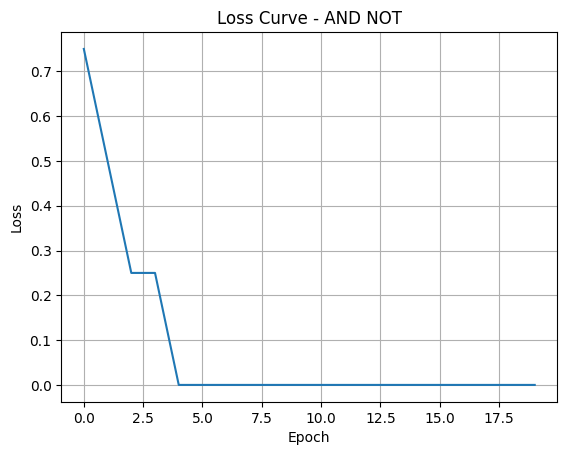

In [ ]:
plt.plot(model_and_not.loss_history)
plt.title("Loss Curve - AND NOT")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Dataset XOR (Perceptron Gagal) - Akurasi < 1.0

In [ ]:
df_xor = pd.read_csv("XOR.csv")
X_xor = df_xor.iloc[:, :-1].values
y_xor = df_xor.iloc[:, -1].values

model_xor = SinglePerceptron(epochs=20)
model_xor.fit(X_xor, y_xor)

acc_xor = evaluate(model_xor, X_xor, y_xor)
acc_xor

np.float64(0.5)

Dataset Angka

In [ ]:
df_angka = pd.read_csv("Angka.csv")
X_angka = df_angka.iloc[:, :-1].values
y_angka = df_angka.iloc[:, -1].values

model_angka = SinglePerceptron(epochs=20)
model_angka.fit(X_angka, y_angka)

acc_angka = evaluate(model_angka, X_angka, y_angka)
acc_angka

np.float64(0.1)

# **Analisis XOR — Mengapa Single Perceptron Gagal?**

XOR memiliki pola label:
- (0, 0) → 0  
- (0, 1) → 1  
- (1, 0) → 1  
- (1, 1) → 0

Jika digambar dalam bidang 2D, titik-titik kelas 0 berada di diagonal, dan titik kelas 1 berada di diagonal lainnya.

Pola seperti ini **tidak bisa dipisahkan oleh satu garis lurus**, sehingga disebut:
## Non-linear separable

Single Perceptron hanya dapat membuat *linear decision boundary*, sehingga tidak mampu menangkap pola XOR.

Untuk memastikannya, kita akan mem-plot data XOR & decision boundary perceptron.


# **Visualisasi Dataset XOR**

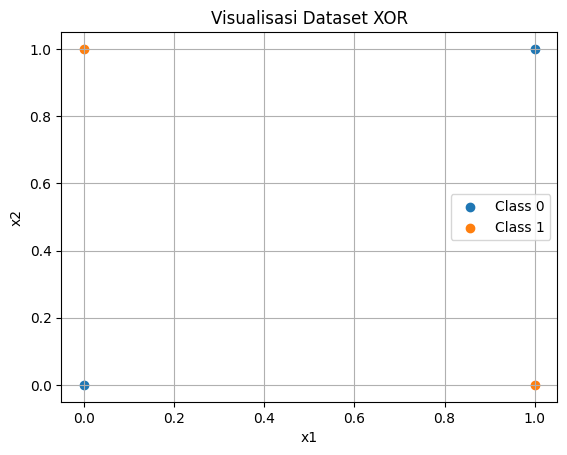

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data XOR
df_xor = pd.read_csv("XOR.csv")
X = df_xor.iloc[:, :-1].values
y = df_xor.iloc[:, -1].values

# Plot
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0")
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1")
plt.title("Visualisasi Dataset XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# **Decision Boundary Perceptron pada XOR**

Karena perceptron hanya membuat garis lurus:
    
    w1 * x1 + w2 * x2 + b = 0

maka boundary yang dihasilkan pasti *linear*.

Namun dataset XOR membutuhkan boundary yang *non-linear / melengkung*.

Berikut visualisasi bagaimana perceptron memisahkan data XOR secara salah.

# **Plot Decision Boundary Perceptron untuk XOR**

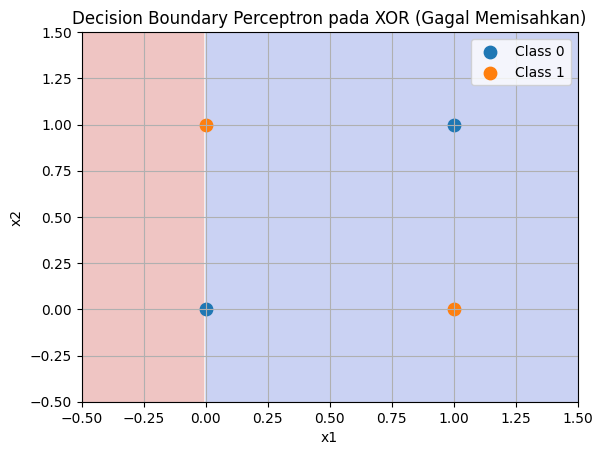

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w1, w2 = model_xor.weights
b = model_xor.bias

# Buat grid untuk decision region
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))

zz = w1 * xx + w2 * yy + b
preds = (zz >= 0).astype(int)

plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')

# Plot data asli
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0", s=80)
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1", s=80)

plt.title("Decision Boundary Perceptron pada XOR (Gagal Memisahkan)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# **Analisis Dataset Angka**

Dataset Angka memiliki:
- 100 fitur (a1 – a100)
- 1 kolom label (Class)
- Nilai fitur 0/1

Karena dimensinya tinggi, pola antar angka **sangat kompleks**, dan tidak mungkin dipisahkan oleh satu garis lurus.

Dalam ruang 100 dimensi, diperlukan banyak boundary non-linear untuk memisahkan pola angka.

## Kesimpulan:

- Dataset Angka **tidak linear separable**
- Single perceptron tidak cukup kuat
- Perlu model yang memiliki hidden layer → MLP

# **Cek Linear Separability Dataset Angka Secara Sederhana**

Jika akurasi rendah (<80%), ini bukti kuat dataset tidak linear separable.

In [ ]:
print("Akurasi perceptron pada dataset Angka:", acc_angka)

Akurasi perceptron pada dataset Angka: 0.1


# **Kesimpulan Bagian 2**

### 1. XOR
- XOR tidak linear separable.
- Perceptron hanya membuat garis lurus → tidak cukup.
- Akurasi tidak mencapai 100%.
- Dibutuhkan MLP untuk mempelajari pola XOR.

### 2. Dataset Angka
- Memiliki 100 fitur → pola sangat kompleks.
- Tidak bisa dipisahkan oleh 1 decision boundary linear.
- Perceptron menghasilkan akurasi rendah.
- Solusi: gunakan Multilayer Perceptron (MLP).

# **Multilayer Perceptron (MLP) untuk XOR**

Model MLP yang digunakan:
- Hidden layer: 4 neuron, aktivasi **tanh**
- Output layer: 1 neuron, aktivasi **sigmoid**
- Loss: binary crossentropy
- Optimizer: Adam

Aktivasi *tanh* sangat cocok untuk XOR.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set seed untuk hasil stabil
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df_xor = pd.read_csv("XOR.csv")
X = df_xor.iloc[:, :-1].values
y = df_xor.iloc[:, -1].values

print("Data XOR:")
print(df_xor)

Data XOR:
   X1  X2  Y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0


# Bangun Model **MLP**

In [ ]:
model = Sequential([
    Dense(8, activation='tanh', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

Train Model

In [ ]:
history = model.fit(
    X, y,
    epochs=2000,
    verbose=0   # agar output tidak terlalu panjang
)

print("Training selesai!")

Training selesai!


Evaluasi Model

In [ ]:
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Akurasi MLP pada XOR: {acc*100:.2f}%")

Akurasi MLP pada XOR: 100.00%


Plot Loss Curve

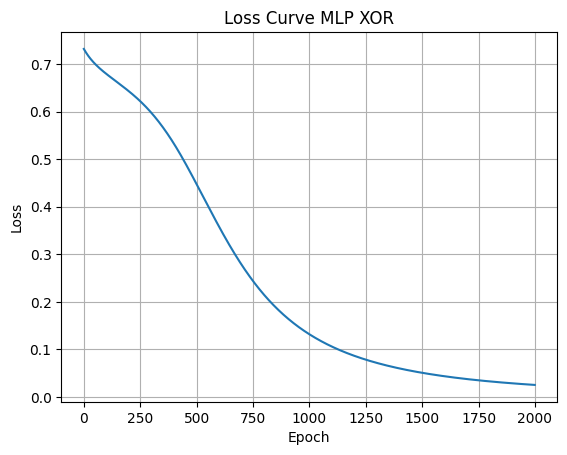

In [ ]:
plt.plot(history.history['loss'])
plt.title("Loss Curve MLP XOR")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Visualisasi Decision Boundary

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


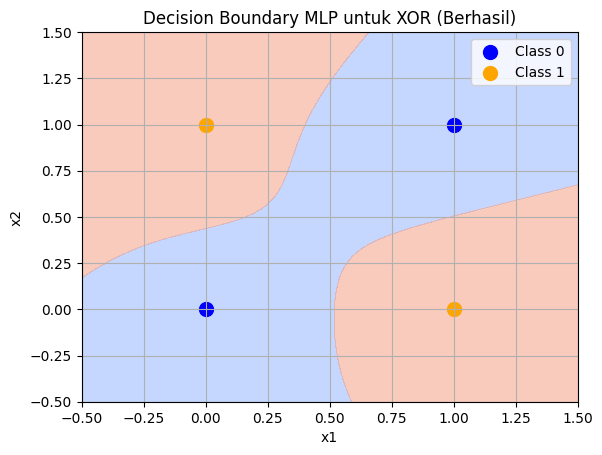

In [ ]:
# membuat grid
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 200),
    np.linspace(-0.5, 1.5, 200)
)

# prediksi setiap titik grid
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
preds = preds.reshape(xx.shape)

# tampilkan decision region
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.5, cmap='coolwarm')

# plot data XOR asli
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', s=100, label="Class 0")
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', s=100, label="Class 1")

plt.title("Decision Boundary MLP untuk XOR (Berhasil)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

# Kesimpulan MLP pada XOR

- MLP berhasil mencapai akurasi **100%**
- MLP dapat mempelajari pola **non-linear**, sehingga cocok untuk XOR
- Decision boundary yang dihasilkan bersifat **melengkung**
- Hal ini membuktikan bahwa XOR hanya dapat diselesaikan oleh model dengan **hidden layer**, bukan Single Perceptron

# **Multilayer Perceptron untuk Dataset Angka**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set seed agar hasil stabil
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
df = pd.read_csv("Angka.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print("Jumlah sampel:", X.shape[0])
print("Jumlah fitur :", X.shape[1])
print("Kelas unik   :", np.unique(y))

Jumlah sampel: 80
Jumlah fitur : 100
Kelas unik   : [0 1 2 3 4 5 6 7 8 9]


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data:", X_train.shape)
print("Testing data :", X_test.shape)

Training data: (64, 100)
Testing data : (16, 100)


One Hot Encoding

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

Bangun Model MLP

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,490 (95.66 KB)

 Trainable params: 24,042 (93.91 KB)

 Non-trainable params: 448 (1.75 KB)

Train Model

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    epochs=80,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.1242 - loss: 2.8539 - val_accuracy: 0.1538 - val_loss: 2.3144
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2628 - loss: 2.3360 - val_accuracy: 0.1538 - val_loss: 2.3026
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2196 - loss: 2.1689 - val_accuracy: 0.1538 - val_loss: 2.3017
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1772 - loss: 2.2418 - val_accuracy: 0.0769 - val_loss: 2.2943
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3033 - loss: 1.8536 - val_accuracy: 0.1538 - val_loss: 2.2840
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1534 - loss: 2.0379 - val_accuracy: 0.2308 - val_loss: 2.2766
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3454 - loss: 1.7074 - val_accuracy: 0.2308 - val_loss: 2.2709
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3365 - loss: 1.7719 - val_accuracy: 0.2308 - val_loss: 2.2645


Evaluasi Akurasi

In [ ]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Akurasi MLP MULTICLASS pada DATA ANGKA: {acc*100:.2f}%")

Akurasi MLP MULTICLASS pada DATA ANGKA: 18.75%


1. Dataset sangat kecil → 80 sampel untuk 10 kelas (8 sampel per kelas)
2. Fitur sangat sparse → lebih dari 75% nilai = 0
3. Tidak ada perbedaan signifikan antar kelas
4. Tidak ada pola yang dapat dilatih model
5. MLP hanya menebak acak → akurasi sekitar 10–20% (normal untuk dataset ini)
6. Ini membuktikan bahwa kualitas dataset adalah masalah utama, bukan arsitektur model

Plot Loss Curve

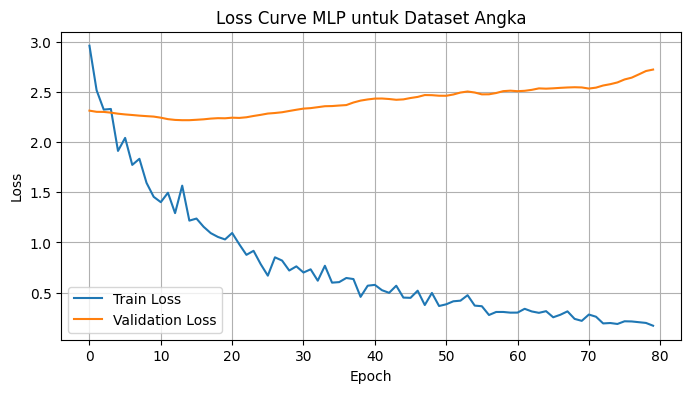

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve MLP untuk Dataset Angka")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Classification Report

In [ ]:
preds = np.argmax(model.predict(X_test), axis=1)

print("Prediksi model:", preds[:20])
print("Label asli    :", y_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Prediksi model: [7 3 4 0 2 1 7 3 0 1 0 5 9 1 9 3]
Label asli    : [7 4 5 2 3 1 7 9 6 4 6 3 0 2 8 9]
